### Importing Modules

In [548]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### 1) Creating an image

We can use numpy to create a 200x200 picture with a rectangle in the middle.

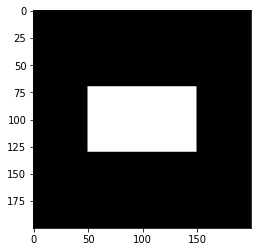

In [549]:
rect_width = 100
rect_height = 60

img = np.zeros((200, 200), dtype=np.uint8)
img[100 - rect_height // 2:100 + rect_height // 2, 100 - rect_width // 2:100 + rect_width // 2] = 255
plt.imshow(img, cmap='gray')

### 2) Perform transformations

I'll use the `affine_transformation` function I implemented in HW2-Q3 notebook:

In [550]:
def affine_transformation(src_image, dest_image, t_matrix):
    '''
    Performs an affine transformation on the dest image to fit the src image.
    :param src_image: source image
    :param dest_image: destination image
    :param t_matrix: transformation matrix
    '''
    for i in range(dest_image.shape[0]):
        for j in range(dest_image.shape[1]):
            x, y, _ = np.matmul(t_matrix, np.array([i, j, 1]))
            # round the result to get the nearest pixel
            x = int(x + 0.5)
            y = int(y + 0.5)
            # check if the pixel is in the image
            if x < src_image.shape[0] and y < src_image.shape[1]:
                dest_image[i][j] = src_image[x][y]
    return dest_image

It is important to note that I've implemented the affine_tranfomation matrix with inverse mapping approach. So, I need to pass the inverse of our translation matrix to the function.

#### A) Translation by 20 pixels in the x direction

First, I translate the image by 20 pixels in the x direction.(vertical)

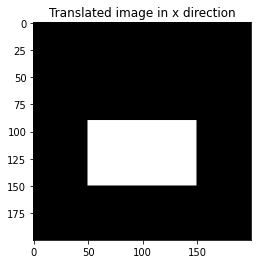

In [551]:
translation_matrix = np.array([
    [1, 0, 20],
    [0, 1, 0],
    [0, 0, 1]
])
inverse_translation_matrix = np.linalg.inv(translation_matrix)
x_translated_image = np.zeros(img.shape, dtype=np.uint8)
x_translated_image = affine_transformation(img, x_translated_image, inverse_translation_matrix)

# showing the image
plt.imshow(x_translated_image, cmap='gray')
plt.title('Translated image in x direction')
plt.show();

#### B) Translation by -40 pixels in y direction

Now, I translate the source image by -40 pixels in the y direction.(horizontal)

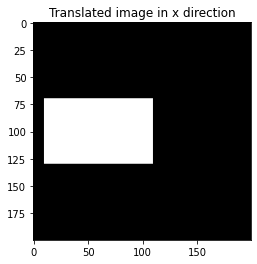

In [552]:
translation_matrix = np.array([
    [1, 0, 0],
    [0, 1, -40],
    [0, 0, 1]
])
inverse_translation_matrix = np.linalg.inv(translation_matrix)
y_translated_image = np.zeros(img.shape, dtype=np.uint8)
y_translated_image = affine_transformation(img, y_translated_image, inverse_translation_matrix)

# showing the image
plt.imshow(y_translated_image, cmap='gray')
plt.title('Translated image in x direction')
plt.show();

#### C) Rotation by 30 degrees

Now, I rotate the source image by 30 degrees.

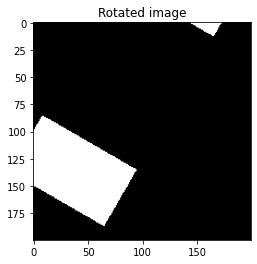

In [553]:
radian = np.deg2rad(-30)
rotation_matrix = np.array([
    [np.cos(radian), -np.sin(radian), 0],
    [np.sin(radian), np.cos(radian), 0],
    [0, 0, 1]
])
inverse_rotation_matrix = np.linalg.inv(rotation_matrix) # the inverse matrix
rotated_30_image = np.zeros(img.shape, dtype=np.uint8)
rotated_30_image = affine_transformation(img, rotated_30_image, inverse_rotation_matrix)

# showing the image
plt.imshow(rotated_30_image, cmap='gray')
plt.title('Rotated image')
plt.show();

#### C) Rotation by 90 degrees

Now, I rotate the source image by 90 degrees.

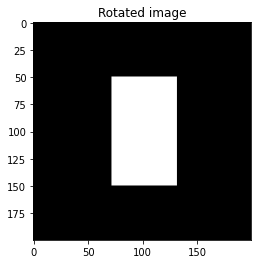

In [554]:
radian = np.deg2rad(-90)
rotation_matrix = np.array([
    [np.cos(radian), -np.sin(radian), 0],
    [np.sin(radian), np.cos(radian), 0],
    [0, 0, 1]
])
inverse_rotation_matrix = np.linalg.inv(rotation_matrix) # the inverse matrix
rotated_90_image = np.zeros(img.shape, dtype=np.uint8)
rotated_90_image = affine_transformation(img, rotated_90_image, inverse_rotation_matrix)

# showing the image
plt.imshow(rotated_90_image, cmap='gray')
plt.title('Rotated image')
plt.show();

### 3) Fourier transform

First we implement a function to perform fourier transform on an image:

In [555]:
def fourier(img):
    '''
    Performs the fourier transform on the image.
    :param img: the image to be transformed
    :return: the transformed image
    '''
    fourier_image = np.fft.fft2(img)
    # shift the image to the center
    return np.fft.fftshift(fourier_image) 

now we can implement a function to plot the image, its fourier magnitude, log scaled fourier magnitude and phase:

In [556]:
def plot_fourier(img):
    '''
    Plots the fourier transform of the image.
    :param img: the image to be transformed
    '''
    # get the fourier transform of the image
    fourier_image = fourier(np.float64(img))
    # get the magnitude of the image
    magnitude = np.abs(fourier_image)
    # log scaled magnitude
    log_magnitude = np.log(magnitude + 1)
    # get the phase of the image
    phase = np.angle(fourier_image)
    # plot
    fig, ax = plt.subplots(1, 4, figsize = (15, 4))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original image')
    ax[1].imshow(magnitude, cmap='gray')
    ax[1].set_title('Magnitude')
    ax[2].imshow(log_magnitude, cmap='gray')
    ax[2].set_title('Log scaled magnitude')
    ax[3].imshow(phase, cmap='gray')
    ax[3].set_title('Phase')
    plt.show()

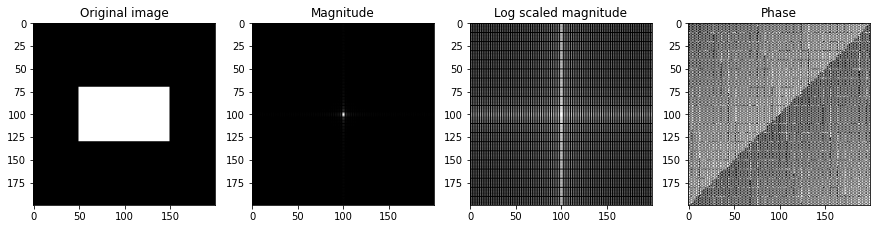

In [557]:
plot_fourier(img)

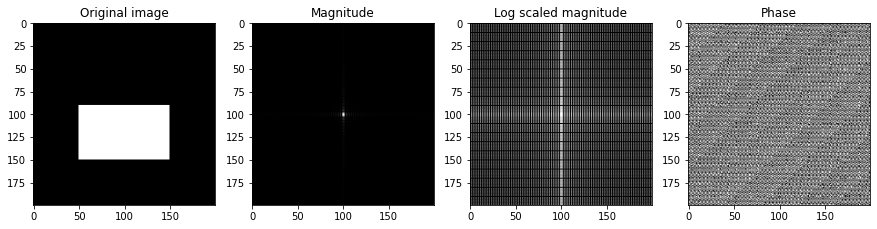

In [558]:
plot_fourier(x_translated_image)

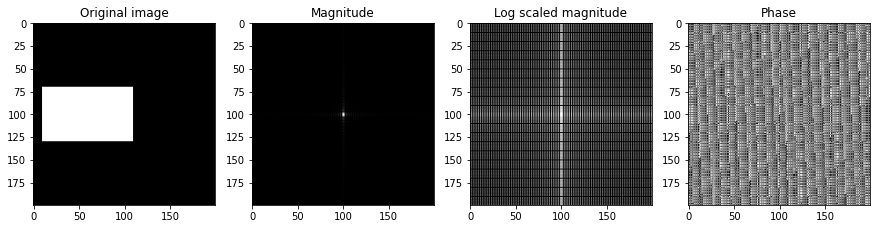

In [559]:
plot_fourier(y_translated_image)

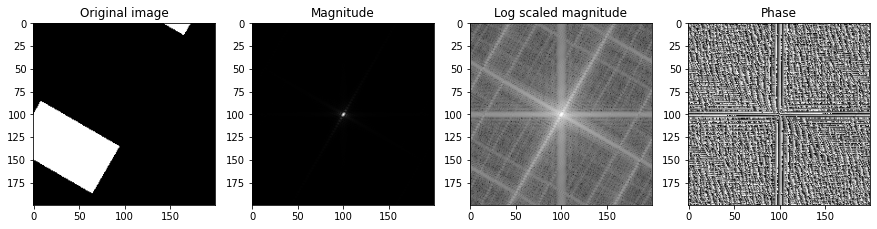

In [560]:
plot_fourier(rotated_30_image)

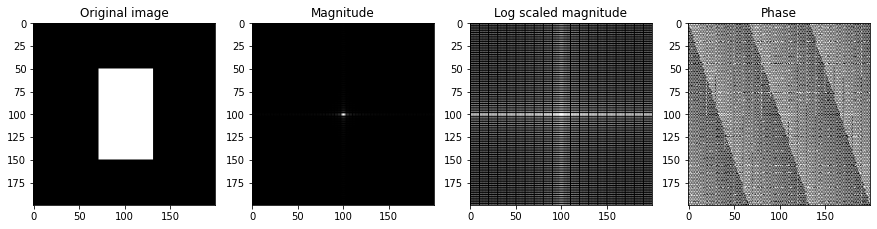

In [561]:
plot_fourier(rotated_90_image)

### 4) Plotting zero frequency valeus

To plot the zero frequency values, we can perform the fourier transform on the image and then use the real part of numbers as their x and the imaginary part as their y.

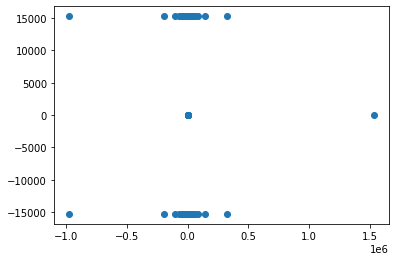

In [562]:
fourier_image = np.fft.fft2(img)
row = fourier_image[0, :]
x_row = [num.real for num in row]
y_row = [num.imag for num in row]
plt.scatter(x_row, y_row);

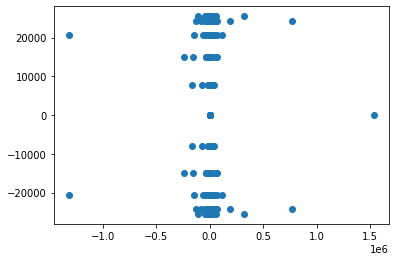

In [563]:
col = fourier_image[:, 0]
x_col = [num.real for num in col]
y_col = [num.imag for num in col]
plt.scatter(x_col, y_col);

### 5) Read metacarpal.png

We can use open cv to read the image:

In [564]:
metacarpal_img = cv2.imread('metacarpal.png', cv2.IMREAD_GRAYSCALE)

### 6) Fourier transform

Now we can use the fourier transform function we implemented in the previous section to plot the fourier transform of the image:

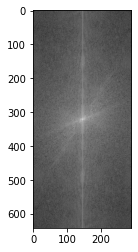

In [565]:
fourier_image = fourier(metacarpal_img)
plt.imshow(np.log(np.abs(fourier_image) + 1), cmap='gray')

### 7) Perform band_reject filtering

we can implement a function to take r1 and r2 parameters to specify the reject zone:

In [566]:
def band_reject_filter(f_image, r1, r2):
    '''
    Performs the band reject filter on the image.
    :param f_image: the fourier transform of the image
    :param r1: the inner radius of the filter
    :param r2: the outer radius of the filter
    :return: the filtered image
    '''
    # get the center of the image
    center = (f_image.shape[1] // 2, f_image.shape[0] // 2)
    # create a mask
    mask = np.ones(f_image.shape, dtype=np.uint8)
    # draw a circle on the mask
    cv2.circle(mask, center, r2, 0, -1)
    cv2.circle(mask, center, r1, 1, -1)
    # apply the mask on the image
    return f_image * mask

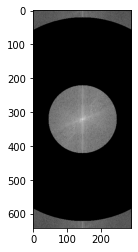

In [567]:
band_reject_image = band_reject_filter(fourier_image, 100, 300)
plt.imshow(np.log(np.abs(band_reject_image) + 1), cmap='gray');

now we implement a function to perform inverse fourier transform on an image:

In [568]:
def inverse_fourier(f_image):
    '''
    Performs the inverse fourier transform on the image.
    :param f_image: the fourier transform of the image
    :return: the transformed image
    '''
    # shift the image to the center
    shifted_image = np.fft.ifftshift(f_image)
    # inverse fourier transform
    return np.fft.ifft2(shifted_image)

and we apply it to our image:

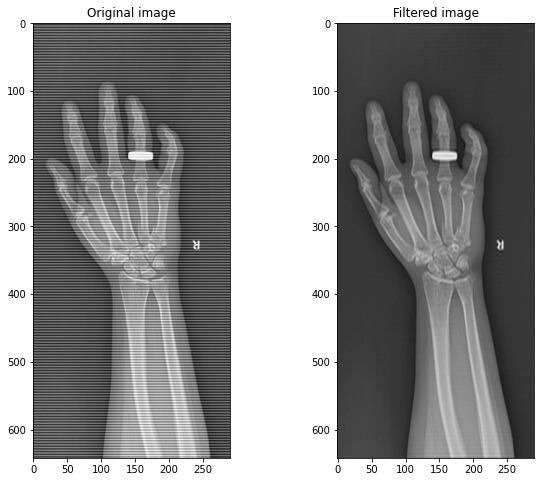

In [569]:
new_image = inverse_fourier(band_reject_image)

fig, ax = plt.subplots(1, 2, figsize = (10, 8))
ax[0].imshow(metacarpal_img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(np.abs(new_image), cmap='gray')
ax[1].set_title('Filtered image');

### 8) Rotating the image

We know that rotating in the frequency domain is equivalent to rotating in the spatial domain. So, we can rotate the image by 180 degrees in the frequency domain.

In [570]:
flipped_180 = np.flip(band_reject_image, 0)
flipped_180 = np.flip(flipped_180, 1)


### 9) The resulting image in spatial domain

Now, we can perform inverse fourier transform to get the rotated image:

In [571]:
rotated_image = inverse_fourier(flipped_180)

### 10) Plotting the result

Now we can plot the input and output image and the frequency domain:

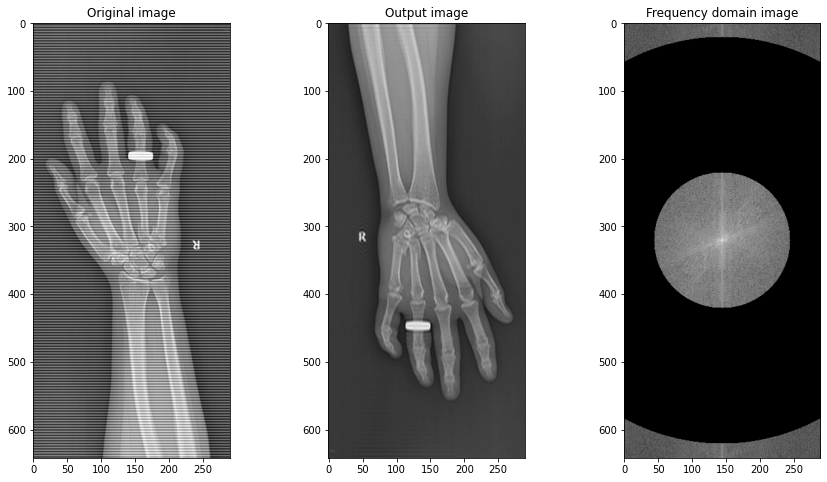

In [572]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

ax[0].imshow(metacarpal_img, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(np.abs(rotated_image), cmap='gray')
ax[1].set_title('Output image')

ax[2].imshow(np.log(np.abs(flipped_180) + 1), cmap='gray')
ax[2].set_title('Frequency domain image');